In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv('heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [6]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

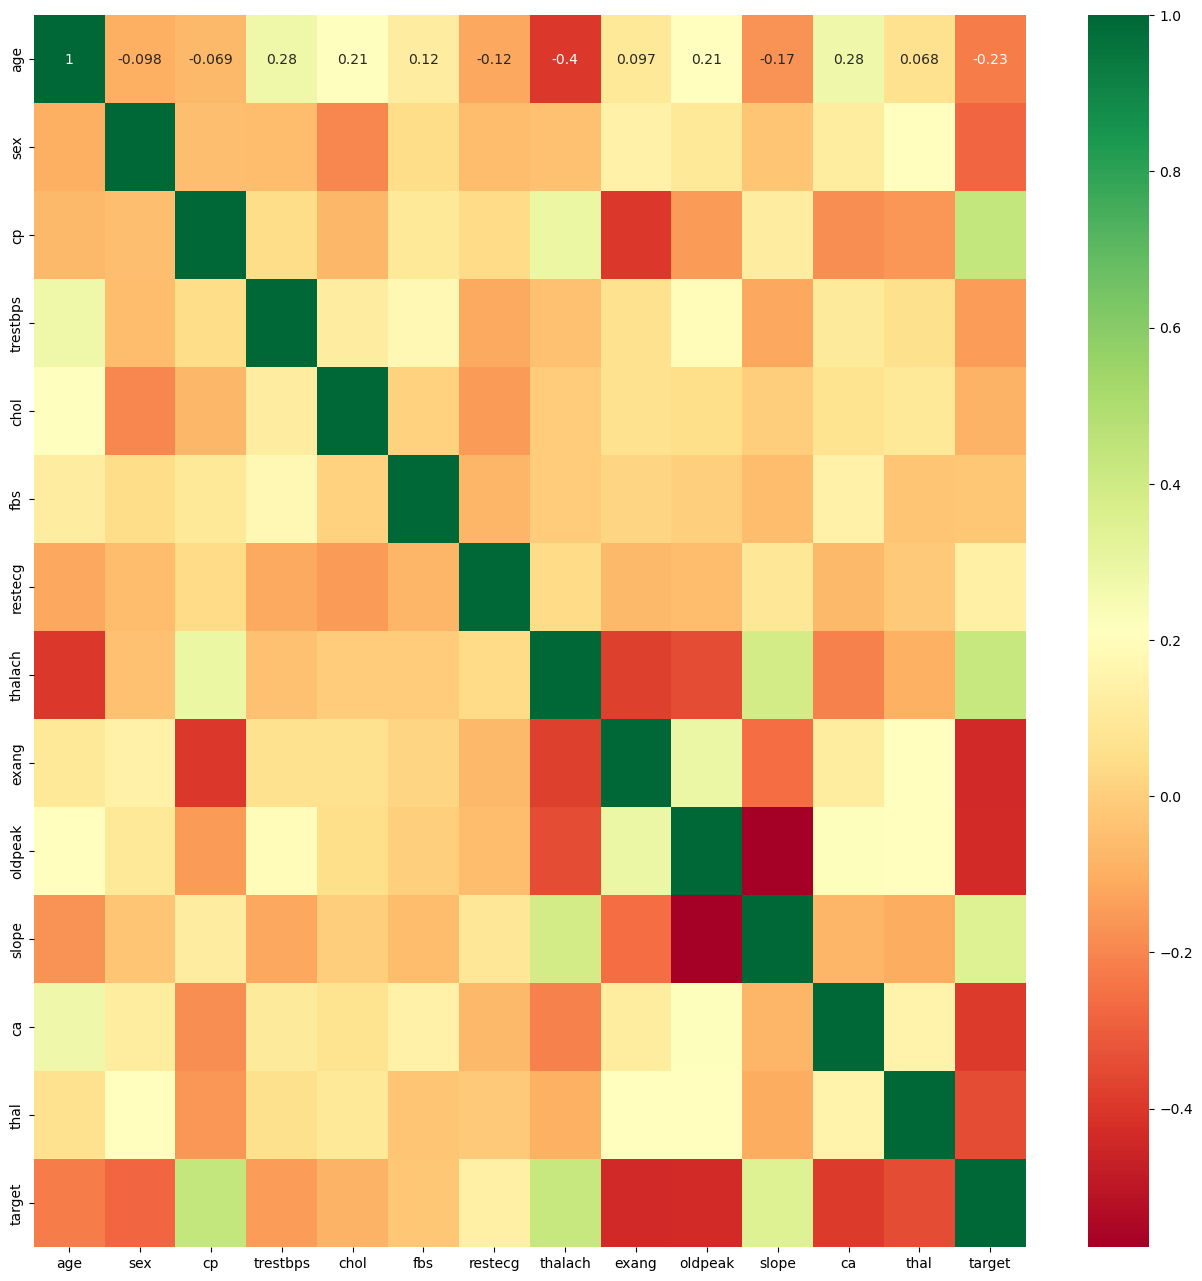

In [8]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

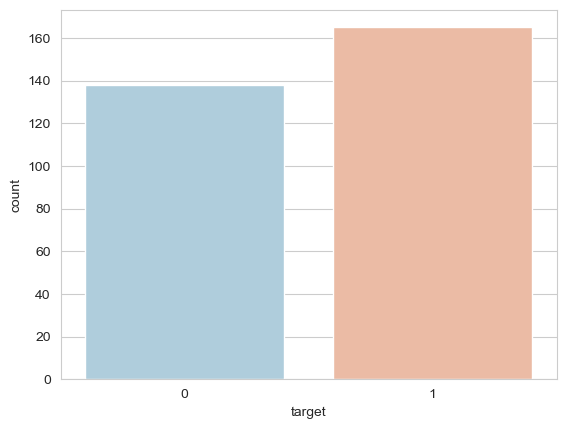

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')
plt.show()

In [11]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 
                                        'fbs','restecg', 
                                        'exang', 'slope', 
                                        'ca', 'thal'])
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [12]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [13]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

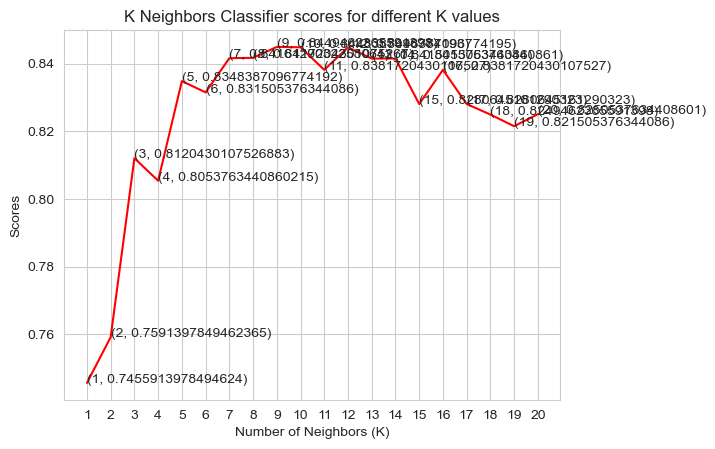

In [14]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.8448387096774195

In [17]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
score.mean()

0.8183870967741935

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv('heart.csv')

# Selecting relevant features
selected_features = ['age', 'sex', 'cp', 'chol', 'thalach', 'oldpeak', 'target']
df = df[selected_features]

# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['sex', 'cp'])

# Standardize numerical features
scaler = StandardScaler()
columns_to_scale = ['age', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Define X and y
X = df.drop(['target'], axis=1)
y = df['target']

# Train the model
knn_classifier = KNeighborsClassifier(n_neighbors=12)
knn_classifier.fit(X, y)

# Random Forest Classifier
randomforest_classifier = RandomForestClassifier(n_estimators=10)
randomforest_classifier.fit(X, y)

# Function to get user input and predict using the model
def predict_heart_disease():
    print("Please answer the following questions to predict the likelihood of heart disease.")
    age = float(input("Enter your age (in years, between 20 and 90): "))
    sex = int(input("Enter your sex (0 for female, 1 for male): "))
    cp = int(input("Do you experience chest pain? (0 for typical angina, 1 for atypical angina, 2 for non-anginal pain, 3 for asymptomatic): "))
    chol = float(input("Enter your serum cholesterol level (in mg/dl, between 100 and 600): "))
    thalach = float(input("Enter your maximum heart rate achieved (in bpm, between 70 and 210): "))
    oldpeak = float(input("Enter the ST depression induced by exercise relative to rest (in mm, between 0 and 7): "))

    # Create input array
    input_data = np.array([[age, sex, cp, chol, thalach, oldpeak, 0, 0, 0, 0]])
    
    # Standardize numerical features
    input_data[:, [0, 3, 4, 5]] = scaler.transform(input_data[:, [0, 3, 4, 5]])

    # Predict using KNN
    knn_prediction = knn_classifier.predict(input_data)[0]
    print("Based on the K Nearest Neighbors model, you are predicted to have" if knn_prediction == 1 else "Based on the K Nearest Neighbors model, you are predicted to not have", "heart disease.")

    # Predict using Random Forest
    rf_prediction = randomforest_classifier.predict(input_data)[0]
    print("Based on the Random Forest model, you are predicted to have" if rf_prediction == 1 else "Based on the Random Forest model, you are predicted to not have", "heart disease.")

# Call the function to make predictions
predict_heart_disease()


Please answer the following questions to predict the likelihood of heart disease.


Enter your age (in years, between 20 and 90):  30
Enter your sex (0 for female, 1 for male):  1
Do you experience chest pain? (0 for typical angina, 1 for atypical angina, 2 for non-anginal pain, 3 for asymptomatic):  1
Enter your serum cholesterol level (in mg/dl, between 100 and 600):  200
Enter your maximum heart rate achieved (in bpm, between 70 and 210):  150
Enter the ST depression induced by exercise relative to rest (in mm, between 0 and 7):  3


Based on the K Nearest Neighbors model, you are predicted to have heart disease.
Based on the Random Forest model, you are predicted to have heart disease.
